In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
normal = pathlib.Path("dataset/normal")
glaucoma = pathlib.Path("dataset/glaucoma")
retinopathy = pathlib.Path("dataset/diabetic_retinopathy")
cataract = pathlib.Path("dataset/cataract")

In [3]:
images_dict = {"normal": list(normal.glob("*.jpg")),
               "glaucoma": list(glaucoma.glob("*.jpg")),
               "diabetic_retinopathy": list(retinopathy.glob("*.jpg")),
               "cataract": list(cataract.glob("*.jpg"))}

labels_dict = {
    "normal":0, "glaucoma":1, "diabetic_retinopathy":2, "cataract":3
}

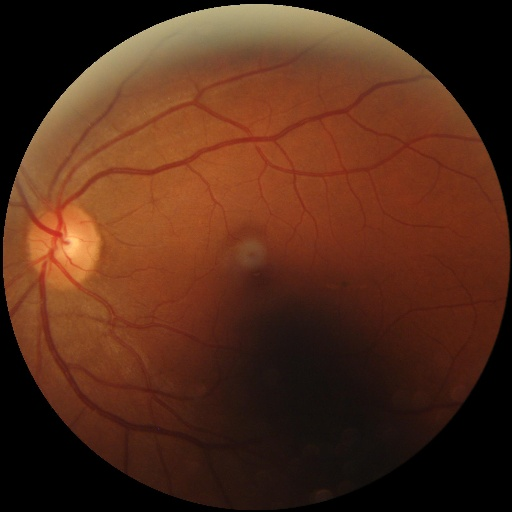

In [4]:
PIL.Image.open(str(images_dict["normal"][200]))

In [5]:
x, y = [], []
for label, images in images_dict.items():
    for image_path in images:
        image = cv2.imread(str(image_path))
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (180, 180))
            x.append(image)
            y.append(labels_dict[label])

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x = x/225

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomContrast(0.3),
    keras.layers.RandomZoom(0.3),
    keras.layers.RandomZoom(0.7),
])

In [10]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(64, (5, 5), padding="same", input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

c:\Users\Reznu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10


In [ ]:
pred = model.predict(x_test[:10])
predlist = []
for i in pred:
  predlist.append(np.argmax(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


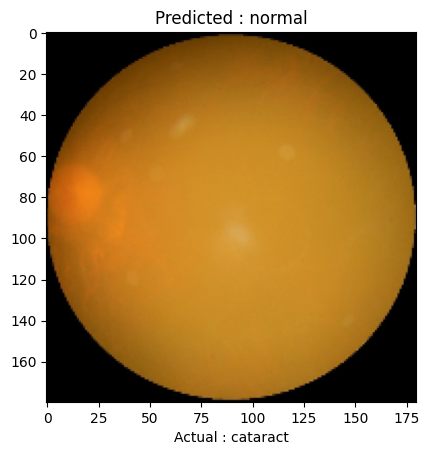

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


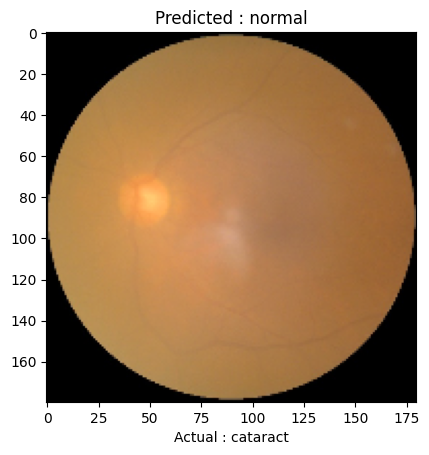

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


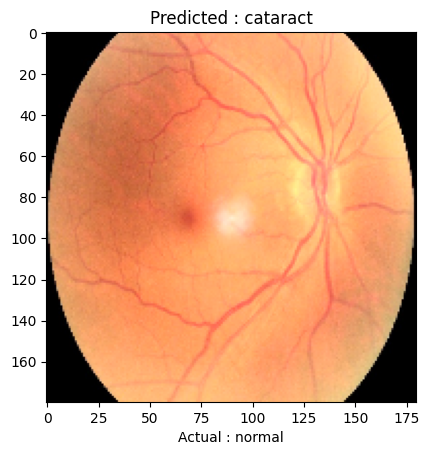

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


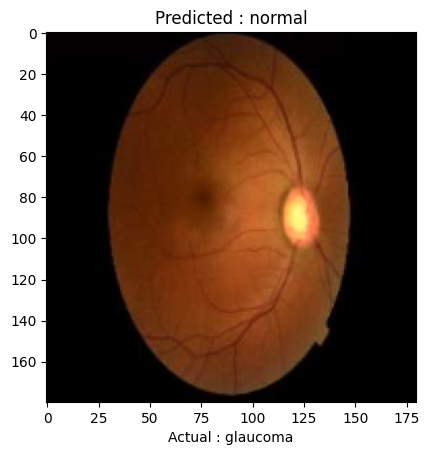

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


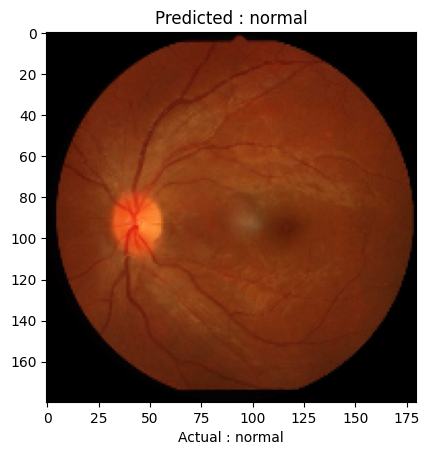

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


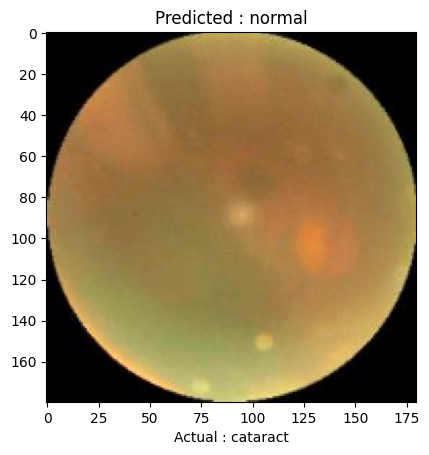

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


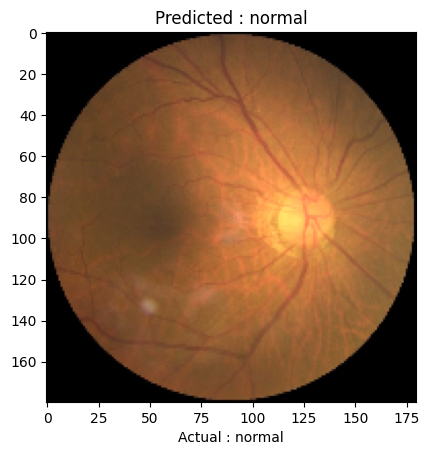

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


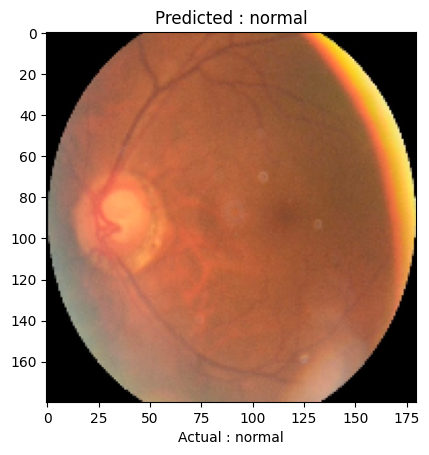

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


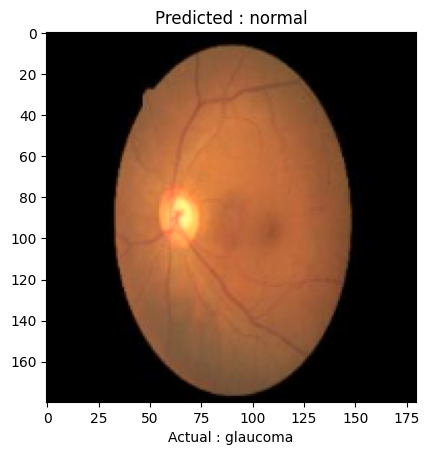

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


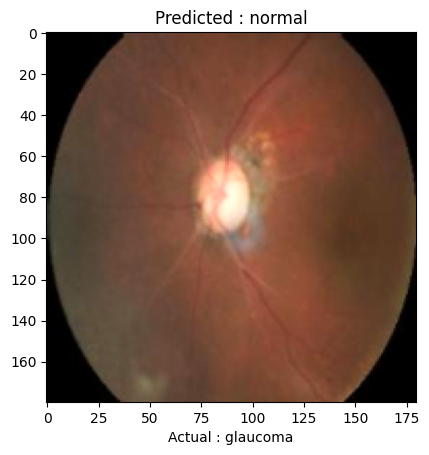

In [ ]:
answers = ["normal", "glaucoma", "diabetic_retinopathy", "cataract"]
for i in range(10):
  plt.imshow(x_test[i])
  plt.title("Predicted : "+ str(answers[predlist[i]]))
  plt.xlabel("Actual : "+ str(answers[y_test[i]]))
  plt.show()